# 101 pandas exercises
https://www.machinelearningplus.com/python/101-pandas-exercises-python/

In [1]:
#1
# import pandas and check the version
import numpy as np
import pandas as pd

print(pd.__version__)
print(pd.show_versions(as_json=True))

1.0.5
{'system': {'commit': None, 'python': '3.8.8.final.0', 'python-bits': 64, 'OS': 'Darwin', 'OS-release': '20.5.0', 'machine': 'x86_64', 'processor': 'i386', 'byteorder': 'little', 'LC_ALL': 'None', 'LANG': 'en_US.UTF-8', 'LOCALE': 'en_US.UTF-8'}, 'dependencies': {'pandas': '1.0.5', 'numpy': '1.19.1', 'pytz': '2021.1', 'dateutil': '2.8.1', 'pip': '21.0.1', 'setuptools': '52.0.0.post20210125', 'Cython': '0.29.23', 'pytest': '5.4.3', 'hypothesis': None, 'sphinx': '4.0.1', 'blosc': None, 'feather': None, 'xlsxwriter': '1.3.8', 'lxml.etree': '4.6.3', 'html5lib': '1.1', 'pymysql': '1.0.2', 'psycopg2': None, 'jinja2': '2.11.3', 'IPython': '7.22.0', 'pandas_datareader': None, 'bs4': '4.9.3', 'bottleneck': '1.3.2', 'fastparquet': None, 'gcsfs': None, 'matplotlib': '3.3.4', 'numexpr': '2.7.3', 'odfpy': None, 'openpyxl': '3.0.7', 'pandas_gbq': None, 'pyarrow': None, 'pytables': None, 'pyxlsb': None, 's3fs': None, 'scipy': '1.5.4', 'sqlalchemy': '1.4.7', 'tables': '3.6.1', 'tabulate': '0.8.9'

In [2]:
#2
# Create a pandas series from each of the items below: a list, numpy and a dictionary
# input from question
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
# answer below
ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)
ser3 = pd.Series(mydict)

print(ser3.head())

a    0
b    1
c    2
e    3
d    4
dtype: int64


In [3]:
#3
# convert the index of a series into the column of a dataframe
# input from question
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)
# answer below
df = ser.to_frame().reset_index()
print(df.head())

  index  0
0     a  0
1     b  1
2     c  2
3     e  3
4     d  4


In [4]:
#4
# combine many series to form a dataframe
# input from question
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))
# answer below
# solution 1
# df = pd.concat([ser1, ser2], axis=1)
# solution 2
df = pd.DataFrame({'col1': ser1, 'col2': ser2})
print(df.head())

  col1  col2
0    a     0
1    b     1
2    c     2
3    e     3
4    d     4


In [5]:
#5
# Give a name to the series ser calling it ‘alphabets’.
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

ser.name = 'alphabets'
ser.head()

0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object

In [6]:
#6
# How to get the items of series A not present in series B?

# From ser1 remove items present in ser2.
serA = pd.Series([1, 2, 3, 4, 5])
serB = pd.Series([4, 5, 6, 7, 8])

serA[~serA.isin(serB)]

0    1
1    2
2    3
dtype: int64

In [7]:
#7
# How to get the items not common to both series A and series B?
serA = pd.Series([1, 2, 3, 4, 5])
serB = pd.Series([4, 5, 6, 7, 8])

serU = pd.Series(np.union1d(serA, serB))     # union
serI = pd.Series(np.intersect1d(serA, serB)) # intersection
serU[~serU.isin(serI)] #, serU, serI

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

In [8]:
#8
# How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

ser = pd.Series(np.random.normal(10, 5, 25))

np.percentile(ser, q=[0, 25, 50, 75, 100])

array([-2.13249056,  7.19480249, 11.41501582, 13.91327467, 20.5918104 ])

In [9]:
#9 
# How to get frequency counts of unique items of a series?
# 'take' gets a letter from list matching the randomly generated number
# i.e. 0 gets 'a' and 7 gets 'h'
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
ser.value_counts()

h    8
f    6
b    5
a    4
d    3
g    2
e    1
c    1
dtype: int64

In [10]:
#10
# How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))
ser[~ser.isin(ser.value_counts().index[:2])] = 'Other'
ser

0         3
1         3
2     Other
3         3
4         4
5         3
6         4
7         3
8         3
9     Other
10        3
11        4
dtype: object

In [11]:
#11
# How to bin a numeric series to 10 groups of equal size?
ser = pd.Series(np.random.random(20))
#pd.qcut(ser, q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], labels=['1rst', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])
pd.qcut(ser, q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])


0     (0.603, 0.884]
1     (0.373, 0.466]
2     (0.603, 0.884]
3     (0.332, 0.373]
4      (0.29, 0.332]
5     (0.332, 0.373]
6     (0.168, 0.198]
7     (0.934, 0.982]
8     (0.884, 0.934]
9     (0.934, 0.982]
10    (0.518, 0.603]
11    (0.168, 0.198]
12     (0.29, 0.332]
13     (0.198, 0.29]
14    (0.466, 0.518]
15    (0.518, 0.603]
16    (0.884, 0.934]
17     (0.198, 0.29]
18    (0.373, 0.466]
19    (0.466, 0.518]
dtype: category
Categories (10, interval[float64]): [(0.168, 0.198] < (0.198, 0.29] < (0.29, 0.332] < (0.332, 0.373] ... (0.518, 0.603] < (0.603, 0.884] < (0.884, 0.934] < (0.934, 0.982]]

In [12]:
#12
# How to convert a numpy array to a dataframe of given shape?
ser = pd.Series(np.random.randint(1, 10, 35))
# '.values' is there to transform series type to ndarray type
# you will get an error if you try to reshape a series, but you can reshape a ndarray
ser.values.reshape(7, 5)

array([[9, 5, 6, 4, 3],
       [5, 7, 2, 9, 8],
       [7, 9, 8, 7, 6],
       [5, 4, 5, 2, 8],
       [6, 4, 9, 6, 5],
       [3, 3, 5, 4, 4],
       [8, 8, 1, 3, 3]])

In [13]:
#13
# Stack ser1 and ser2 vertically and horizontally (to form a dataframe).
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

vertical = ser1.append(ser2)
horizontal = pd.concat([ser1, ser2], axis=1)

In [14]:
vertical

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

In [68]:
horizontal

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [15]:
#14
# extract the items at positions in list pos
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]
ser.take(pos)

0     a
4     e
8     i
14    o
20    u
dtype: object

In [16]:
#15
# Stack ser1 and ser2 vertically and horizontally (to form a dataframe). Input
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [17]:
#15 vertically
ser1.append(ser2)

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

In [18]:
#15 horizontally
pd.concat([ser1, ser2], axis=1)

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [27]:
#16
# Get the positions of items of ser2 in ser1 as a list.
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

# Alternate method
# [pd.Index(ser1).get_loc(i) for i in ser2]

[np.where(i == ser1)[0].tolist()[0] for i in ser2]

[5, 4, 0, 8]

In [30]:
#17
# Compute the mean squared error of truth and pred series. 
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

np.mean((truth - pred) ** 2)

0.3164583073062784

In [38]:
#18
# Change the first character of each word to upper case in each word of ser.
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

# ALternate method
# pd.Series(i.title() for i in ser)

# pd.Series(i[0].upper() + i[1:] for i in ser)

ser.map(lambda x: x.title())

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [3]:
#19
# How to calculate the number of characters in each word in a series?
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
ser.map(lambda x : len(x))

0    3
1    2
2    4
3    4
dtype: int64

In [9]:
#20
# How to compute difference of differences between consequtive numbers of a series?
# take the differences twice
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

ser.diff().diff()

0    NaN
1    NaN
2    1.0
3    1.0
4    1.0
5    1.0
6    0.0
7    2.0
dtype: float64

In [11]:
#21
# How to convert a series of date-strings to a timeseries?
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

pd.to_datetime(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [2]:
#22
# How to get the day of month, week number, day of year and day of week from a series of date strings?
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

import datetime
df = pd.DataFrame(ser)
df = df.rename(columns={0:'date'})
df.date = pd.to_datetime(df.date)
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['weekday'] = df.date.dt.weekday
#df['week_of_year'] = df.date.dt.isocalendar().week
df['week_of_year'] = df.date.dt.weekofyear

df


,date,month,year,weekday,week_of_year
0,2010-01-01 00:00:00,1,2010,4,53
1,2011-02-02 00:00:00,2,2011,2,5
2,2012-03-03 00:00:00,3,2012,5,9
3,2013-04-04 00:00:00,4,2013,3,14
4,2014-05-05 00:00:00,5,2014,0,19
5,2015-06-06 12:20:00,6,2015,5,23


In [9]:
#23
# Change ser to dates that start with 4th of the respective months

ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

ser.map(lambda x: '04 ' + x)

0    04 Jan 2010
1    04 Feb 2011
2    04 Mar 2012
dtype: object

In [18]:
#24
# From ser, extract words that contain atleast 2 vowels.

ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

from collections import Counter

atleast2 = ser.map(lambda x: sum([Counter(x.lower()).get(i, 0) for i in list('aeiou')]) >=2)
ser[atleast2]

0     Apple
1    Orange
4     Money
dtype: object

In [3]:
#25
# Extract the valid emails from the series emails. The regex pattern for valid emails is provided as reference.
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

import re
emails.str.findall(pattern, flags=re.IGNORECASE)

0                     []
1    [rameses@egypt.com]
2            [matt@t.co]
3    [narendra@modi.com]
dtype: object

In [4]:
#26
# Compute the mean of weights of each fruit.
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))
#print(weights.tolist())
#print(fruit.tolist())

weights.groupby(fruit).mean()

apple     7.250000
banana    5.000000
carrot    3.666667
dtype: float64

In [4]:
#27
# Compute the euclidean distance between series (points) p and q, without using a packaged formula.

p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

dist = np.sqrt(sum([(a-b) * (a-b) for a, b in zip(p, q)]))
dist

18.16590212458495

In [6]:
#28
# Get the positions of peaks (values surrounded by smaller values on both sides) in ser.

ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

# Alternate method
# ser[ser == max(ser)]

np.where(ser == max(ser), True, False)

array([False,  True, False, False, False,  True, False, False, False])

In [14]:
#29
# Replace the spaces in my_str with the least frequent character. 
my_str = 'dbc deb abed gade'

freq = pd.Series(list(my_str))
least_freq = freq.value_counts().index[-1]

my_str = my_str.replace(' ', least_freq)

my_str

'dbcgdebgabedggade'

In [16]:
#30
# How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) 
# after that having random numbers as values?

pd.Series(np.random.randint(1,10,10), pd.date_range('2001-01-01', periods=10, freq='W-SAT'))

2001-01-06    1
2001-01-13    5
2001-01-20    2
2001-01-27    2
2001-02-03    4
2001-02-10    6
2001-02-17    3
2001-02-24    9
2001-03-03    4
2001-03-10    8
Freq: W-SAT, dtype: int64

In [39]:
#31
# ser has missing dates and values. Make all missing dates appear and fill up with value from previous date.

ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))

# This only forward fills the immediately previous value, 
# so if we have two NAN in a row then after ffill we will still have the second NAN
#ser.resample('D').ffill()

# limit argument tells how many sequential NANS can be ffilled, but the last NAN is still not filled
#ser.resample('D').ffill(limit=2)

#ser.resample('D').fillna(method='ffill')

# bfill then ffill got rid of NAN at end, but the series is different than the ffill only versions
ser.resample('D').bfill().ffill()

2000-01-01     1.0
2000-01-02    10.0
2000-01-03    10.0
2000-01-04     3.0
2000-01-05     3.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     3.0
Freq: D, dtype: float64

In [14]:
#32
# Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.

ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

autocorrelation = [ser.autocorr(i).round(2) for i in range(10)]
np.argmax(np.abs(autocorrelation))

0

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

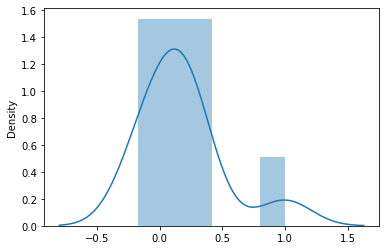

In [16]:
# Getting a look at distribution of ser from question 32
import seaborn as sns
sns.distplot(autocorrelation)

In [9]:
#33
# Import every 50th row of BostonHousing dataset as a dataframe. 

# Creates an object containing chunks, not a table
# The chunks contain 50 rows
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)

# This takes the first row of each chunk (each chunk contains 50 rows) and concatenates them into a series
pd.concat([chunk.iloc[0] for chunk in df], axis=0)

crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
             ...    
tax        391.00000
ptratio     19.20000
b          396.90000
lstat       14.33000
medv        16.80000
Length: 154, dtype: float64

In [5]:
#34
# Import the boston housing dataset, but while importing change the 'medv' (median house value) column 
# so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.medv = np.where(df.medv >= 25, 'High', 'Low')

df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Low


In [13]:
#35
# How to create a dataframe with rows as strides from a given series?

L = pd.Series(range(15))

stride_len = 2
window_len = 4
n_strides = ((L.size - window_len ) // stride_len) + 1


np.array ([L[s:(s+window_len)] for s in np.arange(0, L.size, stride_len)[:n_strides]])

# np.arange(0, L.size, stride_len) means everything from 0 to 15, the stride_len means every nth (2nd) element

# [:n_strides] shortens the range given previously and means start at the first element and 
# go to the sixth element (because n_strides =6)
# this means that we go down 0, 2, 4, 6, 8, 10 (six elements)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

In [5]:
#36
# Import ‘crim’ and ‘medv’ columns of the BostonHousing dataset as a dataframe.

#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
#df = df[['crim', 'medv']]

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', usecols=['crim', 'medv'])

df

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
...,...,...
501,0.06263,22.4
502,0.04527,20.6
503,0.06076,23.9
504,0.10959,22.0


In [17]:
#37
# Get the number of rows, columns, datatype and summary statistics of each column of the Cars93 dataset. 
# Also get the numpy array and list equivalent of the dataframe.

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

print('THe shape is: ', df.shape)
print(df.dtypes)
print(df.info)
print(df.describe())

THe shape is:  (93, 27)
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object
<bound method DataFrame.info of    Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9

In [18]:
#37
# turned into numpy array
df.values

array([['Acura', 'Integra', 'Small', ..., 2705.0, 'non-USA',
        'Acura Integra'],
       [nan, 'Legend', 'Midsize', ..., 3560.0, 'non-USA', 'Acura Legend'],
       ['Audi', '90', 'Compact', ..., 3375.0, 'non-USA', 'Audi 90'],
       ...,
       ['Volkswagen', 'Corrado', 'Sporty', ..., 2810.0, 'non-USA',
        'Volkswagen Corrado'],
       ['Volvo', '240', 'Compact', ..., 2985.0, 'non-USA', 'Volvo 240'],
       [nan, '850', 'Midsize', ..., 3245.0, 'non-USA', 'Volvo 850']],
      dtype=object)

In [22]:
#37
# turned into list
df.values.tolist()

[['Acura',
  'Integra',
  'Small',
  12.9,
  15.9,
  18.8,
  25.0,
  31.0,
  'None',
  'Front',
  '4',
  1.8,
  140.0,
  6300.0,
  2890.0,
  'Yes',
  13.2,
  5.0,
  177.0,
  102.0,
  68.0,
  37.0,
  26.5,
  nan,
  2705.0,
  'non-USA',
  'Acura Integra'],
 [nan,
  'Legend',
  'Midsize',
  29.2,
  33.9,
  38.7,
  18.0,
  25.0,
  'Driver & Passenger',
  'Front',
  '6',
  3.2,
  200.0,
  5500.0,
  2335.0,
  'Yes',
  18.0,
  5.0,
  195.0,
  115.0,
  71.0,
  38.0,
  30.0,
  15.0,
  3560.0,
  'non-USA',
  'Acura Legend'],
 ['Audi',
  '90',
  'Compact',
  25.9,
  29.1,
  32.3,
  20.0,
  26.0,
  'Driver only',
  'Front',
  '6',
  2.8,
  172.0,
  5500.0,
  2280.0,
  'Yes',
  16.9,
  5.0,
  180.0,
  102.0,
  67.0,
  37.0,
  28.0,
  14.0,
  3375.0,
  'non-USA',
  'Audi 90'],
 ['Audi',
  '100',
  'Midsize',
  nan,
  37.7,
  44.6,
  19.0,
  26.0,
  'Driver & Passenger',
  nan,
  '6',
  nan,
  172.0,
  5500.0,
  2535.0,
  nan,
  21.1,
  6.0,
  193.0,
  106.0,
  nan,
  37.0,
  31.0,
  17.0,
  3405.0,


In [24]:
#38
# Which manufacturer, model and type has the highest Price? 
# What is the row and column number of the cell with the highest Price value?

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#df.Manufacturer[df.Price == max(df.Price)]
#df.Model[df.Price == max(df.Price)]
#df.Type[df.Price == max(df.Price)]

# Manufacturer with the highest price
df.loc[df.Price == np.max(df.Price), ['Manufacturer', 'Model', 'Type']]

58    Mercedes-Benz
Name: Manufacturer, dtype: object

In [35]:
#38
# Highest price value
row, col = np.where(df.values == max(df.Price))
df.iloc[row[0], col[0]]

61.9

In [10]:
#39
# Rename the column Type as CarType in df and replace the ‘.’ in column names with ‘_’.

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
#print(df.columns)
#> Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
#>        'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
#>        'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
#>        'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
#>        'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
#>        'Make'],
#>       dtype='object')

df = df.rename(columns={'Type':'CarType'})
#df.replace('.', '_', inplace=True)
df.columns = df.columns.map(lambda x: x.replace('.', '_'))

df.columns

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [3]:
#40
# Check if df has any missing values.

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df.isnull().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

In [19]:
#41
# Count the number of missing values in each column of df. 
# Which column has the maximum number of missing values? 

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# n_nulls is a lambda that gives the exact same answer as the previous question
#n_nulls = df.apply(lambda x: x.isnull().sum())
#n_nulls.argmax()

df2 = pd.DataFrame(df.isnull().sum())

df2.idxmax()

0    Luggage.room
dtype: object

In [10]:
#42
# Replace missing values in Min.Price and Max.Price columns with their respective mean.

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')



mean_min = df['Min.Price'].mean()
mean_max = df['Max.Price'].mean()
df['Min.Price'].fillna(value=mean_min, inplace=True)
df['Max.Price'].fillna(value=mean_max, inplace=True)

df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              0
Price                  2
Max.Price              0
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

In [3]:
#43
# In df, use apply method to replace the missing values in Min.Price 
# with the column’s mean and those in Max.Price with the column’s median. 

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df = df[['Min.Price', 'Max.Price']].apply(lambda x: x.fillna(x.mean()))

df

# Solution from Answers
#d = {'Min.Price': np.nanmean, 'Max.Price': np.nanmedian}
#df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']].apply(lambda x, d: x.fillna(d[x.name](x)), args=(d, ))

,Min.Price,Max.Price
0,12.900000,18.800000
1,29.200000,38.700000
2,25.900000,32.300000
3,17.118605,44.600000
4,17.118605,21.459091
...,...,...
88,16.600000,22.700000
89,17.600000,22.400000
90,22.900000,23.700000
91,21.800000,23.500000


In [5]:
#44
# Get the first column (a) in df as a dataframe (rather than as a Series).

df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))

type(df[['a']])

pandas.core.frame.DataFrame